In [121]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

from qiskit_aer import AerSimulator

from math import pi
import matplotlib.pyplot as plt
from itertools import product

In [146]:
def run(qc, shots=1024):
    simulator = AerSimulator()
    counts = simulator.run(transpile(qc, simulator), shots=shots).result().get_counts()
    results = {}
    for bit_string in product('01', repeat=len(qc.qubits)):
        bit_string = ''.join(bit_string)
        results[bit_string] = 0 if counts.get(bit_string) is None else counts[bit_string]
    display(plot_histogram(results))

In [113]:
def fibonacci(n):
    qc = QuantumCircuit(n)
    qc.ry(pi/2, range(n))

    if(n > 1):
        for i in range(0, n-1):
            qc.cry(-pi/2, i, i+1)
    return qc

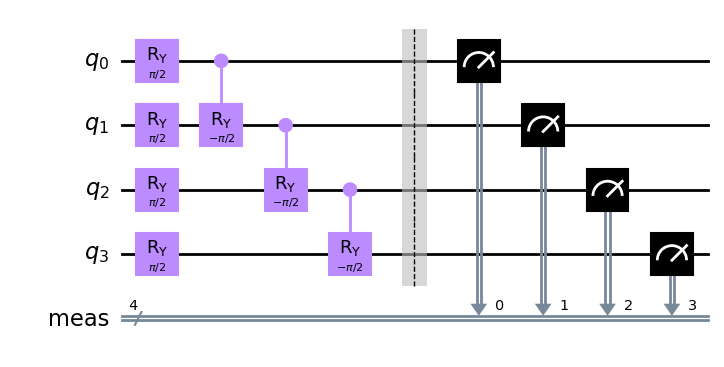

In [118]:
qc = fibonacci(4)
qc.measure_all()
qc.draw('mpl')

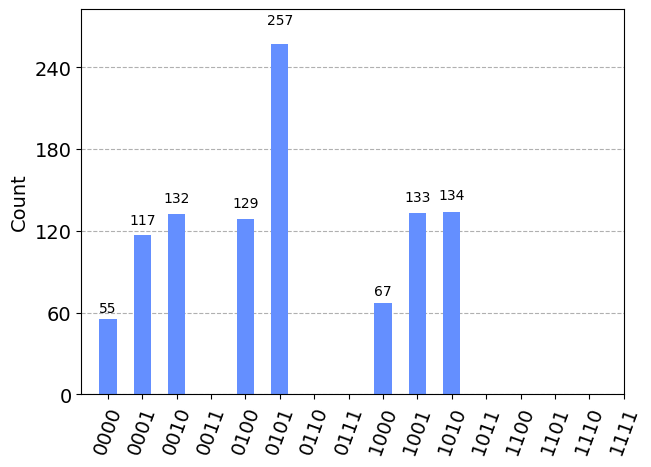

In [147]:
run(qc)